# WBGTindividual global figures for the multipanel Figure 12.4 of Chapter 12

## Produces the figures for:
- 20412060 ssp585 - historical (mid-21st century)
- 20812100 ssp585 - historical (late-21st century)
- 20812100 ssp126 - historical (late-21st century)
- the colorbar

In [1]:
# -- Preparing the files

# -- Select the periods by scenario
# -- Compute annual sums
# -- Split the annual files
# -- Using CliMAF:
# --   - compute the individual differences
# --   - compute the ensemble statistics
# --   - start the plot of the ensemble median
# --   - code model agreement

In [1]:
import os, glob
import xarray as xr
from IPython.display import Image
from PIL import Image as PILImage

## The input files are provided by CICERO (Clemens and Carley)

### Import the CliMAF library to do the pretreatments (https://climaf.readthedocs.io/en/master/)

In [2]:
from climaf.api import *

CliMAF version = 1.2.13


CliMAF install => /ciclad-home/jservon/Evaluation/CliMAF/climaf_installs/climaf_V1.2.13_post
python => /modfs/modtools/miniconda2/envs/analyse_2.7_v2/bin/python
---
Required softwares to run CliMAF => you are using the following versions/installations:
ncl 6.6.2 => /modfs/modtools/miniconda2/envs/analyse_2.7_v2/bin/ncl
cdo 1.9.6 => /opt/nco/1.9/bin/cdo
nco (ncks) 4.5.2 => /opt/nco-4.5.2/bin/ncks
ncdump fichier => /modfs/modtools/miniconda2/envs/analyse_2.7_v2/bin/ncdump
Check stamping requirements
nco (ncatted) found -> /opt/nco-4.5.2/bin/ncatted
convert found -> /usr/bin/convert
pdftk found -> /usr/bin/pdftk
exiv2 found -> /ciclad-home/jservon/Evaluation/CliMAF/climaf_installs/climaf_V1.2.13_post/bin/exiv2
---


Cache directory set to : /data/jservon/climafcache (use $CLIMAF_CACHE if set) 
Cache directory for remote data set to : /data/jservon/climafcache/remote_data (use $CLIMAF_REMOTE_CACHE if set) 
Available macros read from ~/.climaf.macros are : []


### Declare the access to the archive

In [6]:
pattern ='/projsu/cmip-work/rvautard/IPCC/SWE${experiment}/snw100seas.${model}.${clim_period}.meanG.nc'
cproject('SWE_cordex_ch12','experiment',('period','fx'),'clim_period','model', ('variable','snw'), ensemble=['model'], separator='%')
dataloc(project='SWE_cordex_ch12', url=pattern) 


<climaf.dataloc.dataloc instance at 0x2b0017975050>

## Work on the individual models:
- create scenario and baseline ensembles => select common models
- compute annual sums
- compute climatologies
- compute differences

In [4]:
import regionmask
import numpy as np
common_grid_filename = '/home/jservon/Chapter12_IPCC/data/Figure_12.9/EUROPE_raw_common_grid.nc'

lats = np.arange(25, 75, 0.1)
lons = np.arange(-15, 65, 0.1)
mask = regionmask.defined_regions.natural_earth.land_110.mask(lons, lats)
mask.to_netcdf(common_grid_filename)


def add_lonlat_variable_attributes(filename, variable):
    import os
    cmd = 'ncrename -v .region,'+variable+' '+filename+' ; ncatted -O -a coordinates,'+variable+',o,c,"lon lat" -a units,lon,o,c,degrees_east -a units,lat,o,c,degrees_north -a standard_name,lon,o,c,longitude -a standard_name,lat,o,c,latitude '+filename
    print cmd
    os.system(cmd)

def mask_common_grid(filename):
    #cmd = 'cdo setctomiss,0 '+filename+' tmp.nc ; mv tmp.nc '+filename
    cmd = 'cdo setmissval,1e+20 -addc,1 '+filename+' tmp.nc ; mv tmp.nc '+filename
    print cmd
    os.system(cmd)

add_lonlat_variable_attributes(common_grid_filename, 'lsmmask')
mask_common_grid(common_grid_filename)

ncrename -v .region,lsmmask /home/jservon/Chapter12_IPCC/data/Figure_12.9/EUROPE_raw_common_grid.nc ; ncatted -O -a coordinates,lsmmask,o,c,"lon lat" -a units,lon,o,c,degrees_east -a units,lat,o,c,degrees_north -a standard_name,lon,o,c,longitude -a standard_name,lat,o,c,latitude /home/jservon/Chapter12_IPCC/data/Figure_12.9/EUROPE_raw_common_grid.nc
cdo setmissval,1e+20 -addc,1 /home/jservon/Chapter12_IPCC/data/Figure_12.9/EUROPE_raw_common_grid.nc tmp.nc ; mv tmp.nc /home/jservon/Chapter12_IPCC/data/Figure_12.9/EUROPE_raw_common_grid.nc


In [7]:
# -- Create ensemble for historical baseline
req_baseline = ds(project='SWE_cordex_ch12',
                  experiment = 'RCP85',
                  clim_period = 'ref',
                  model = '*',
                 )
ens_baseline = req_baseline.explore('ensemble')

In [8]:
ens_baseline

cens({'CANESMr1-CCLM':ds('SWE_cordex_ch12%%snw%fx%global%RCP85%ref%CANESMr1-CCLM'),'CANESMr1-REMO':ds('SWE_cordex_ch12%%snw%fx%global%RCP85%ref%CANESMr1-REMO'),'CNRMr1-ALADIN53':ds('SWE_cordex_ch12%%snw%fx%global%RCP85%ref%CNRMr1-ALADIN53'),'CNRMr1-ALADIN63':ds('SWE_cordex_ch12%%snw%fx%global%RCP85%ref%CNRMr1-ALADIN63'),'CNRMr1-CCLM':ds('SWE_cordex_ch12%%snw%fx%global%RCP85%ref%CNRMr1-CCLM'),'CNRMr1-HIRHAM':ds('SWE_cordex_ch12%%snw%fx%global%RCP85%ref%CNRMr1-HIRHAM'),'CNRMr1-RACMO':ds('SWE_cordex_ch12%%snw%fx%global%RCP85%ref%CNRMr1-RACMO'),'CNRMr1-REMO':ds('SWE_cordex_ch12%%snw%fx%global%RCP85%ref%CNRMr1-REMO'),'CNRMr1-WRF381P':ds('SWE_cordex_ch12%%snw%fx%global%RCP85%ref%CNRMr1-WRF381P'),'ECEARTHr1-HIRHAM':ds('SWE_cordex_ch12%%snw%fx%global%RCP85%ref%ECEARTHr1-HIRHAM'),'ECEARTHr1-RACMO':ds('SWE_cordex_ch12%%snw%fx%global%RCP85%ref%ECEARTHr1-RACMO'),'ECEARTHr1-RCA':ds('SWE_cordex_ch12%%snw%fx%global%RCP85%ref%ECEARTHr1-RCA'),'ECEARTHr12-CCLM':ds('SWE_cordex_ch12%%snw%fx%global%RCP85%r

In [18]:
# -- Create ensemble object for the scenario
req_exp = ds(project='SWE_cordex_ch12',
             experiment = 'RCP85',
             clim_period = 'mce',
             model = '*',
            )
ens_exp = req_exp.explore('ensemble')

# -- Extract common members
wens_baseline, wens_exp = ensemble_intersection([ens_baseline, ens_exp])

# -- Climatologies
clim_baseline = clim_average(wens_baseline, 'ANM')
clim_exp      = clim_average(wens_exp, 'ANM')

# -- Difference
diff = fsub(clim_exp, clim_baseline)

# -- Ensemble median
ensmedian = ccdo_ens(diff, operator='enspctl,50')

outdatadir = '/home/jservon/Chapter12_IPCC/data/Figure_12.9/'

# -- Mask of models with
ens_mask_pos = ccdo(diff, operator='gtc,0')
ens_mask_neg = ccdo(diff, operator='ltc,0')
ens_mask_zero = ccdo(diff, operator='eqc,0')

perc_ens_pos = fmul( fdiv( ccdo_ens(ens_mask_pos, operator='enssum'), len(diff) ), 100 )
perc_ens_neg = fmul( fdiv( ccdo_ens(ens_mask_neg, operator='enssum'), len(diff) ), 100 )
perc_ens_zero = fmul( fdiv( ccdo_ens(ens_mask_zero, operator='enssum'), len(diff) ), 100 )

# -- Signif90
perc_agreement = '80'
signif90_pos = ccdo(perc_ens_pos, operator='gtc,'+perc_agreement)
signif90_neg = ccdo(perc_ens_neg, operator='gtc,'+perc_agreement)
signif90_zero = ccdo(perc_ens_zero, operator='gtc,'+perc_agreement)
signif90 = fadd( fadd(signif90_pos, signif90_neg), signif90_zero)

mask_agreement_name = outdatadir + 'mask_'+perc_agreement+'perc-agreement_SWE_panel_b_RCP85_mce_minus_baseline.nc'
cfile(regridn(signif90, cdogrid=common_grid_filename), target=mask_agreement_name)
cmd = 'ncatted -O -a comment,global,o,c,"This file is used for the hatching of panel_b of figure 12.9 - Chapter 12" '+mask_agreement_name
os.system(cmd)

ensmedian_filename = outdatadir + 'SWE_panel_b_RCP85_mce_minus_baseline.nc'
cmd = 'ncatted -O -a comment,global,o,c,"This file is used for panel_b of figure 12.9 - Chapter 12" '+ensmedian_filename
cfile(regridn(ensmedian, cdogrid=common_grid_filename), target=ensmedian_filename)
os.system(cmd)

0

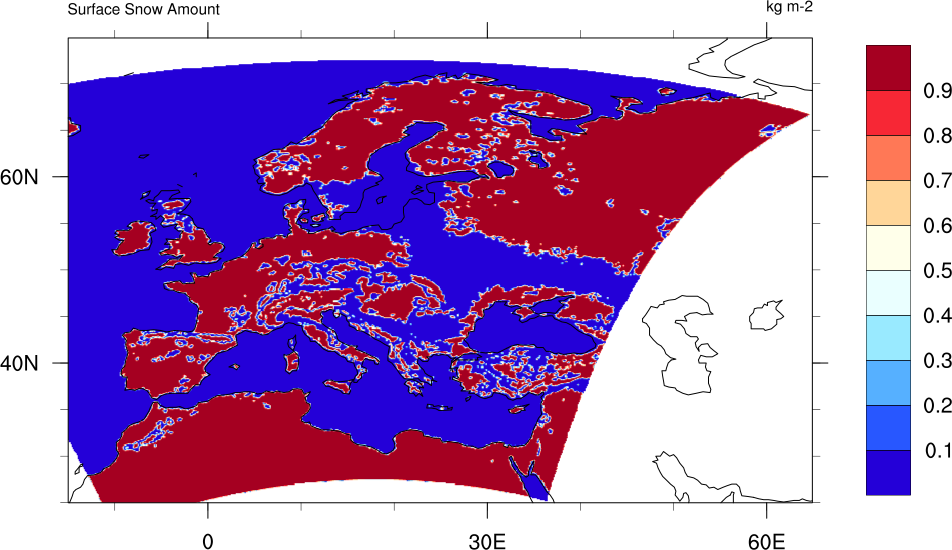

In [17]:
implot(regridn(signif90, cdogrid=common_grid_filename))